## Морфологический анализ текста на русском языке

# Задания


**Задание 1.**
> Выполните лемматизацию/стемминг стихотворения разными интсрументами. Проанализируйте полученные результаты. Сделайте выводы о качестве работы инструментов с несловарными словами.




Стихотворение:

Варкалось. Хливкие шорьки

Пырялись по наве,

И хрюкотали зелюки,

Как мюмзики в мове.


---




О бойся Бармаглота, сын!

Он так свирлеп и дик,

А в глуше рымит исполин —

Злопастный Брандашмыг!



---



Но взял он меч, и взял он щит,

Высоких полон дум.

В глущобу путь его лежит

Под дерево Тумтум.



---



Он стал под дерево и ждет.

И вдруг граахнул гром —

Летит ужасный Бармаглот

И пылкает огнем!



---



Раз-два, раз-два! Горит трава,

Взы-взы — стрижает меч,

Ува! Ува! И голова

Барабардает с плеч!



---



О светозарный мальчик мой!

Ты победил в бою!

О храброславленный герой,

Хвалу тебе пою!



---



Варкалось. Хливкие шорьки

Пырялись по наве.

И хрюкотали зелюки,

Как мюмзики в мове.


© Льюис Кэрролл


*Инструменты для сравнения:*

* стеммер Портера (см. Лабораторная работа 1).
* стеммер SnowBallStemmer
* mystem
* pymorphy2



In [1]:
text = """
Варкалось. Хливкие шорьки

Пырялись по наве,

И хрюкотали зелюки,

Как мюмзики в мове.


О бойся Бармаглота, сын!

Он так свирлеп и дик,

А в глуше рымит исполин —

Злопастный Брандашмыг!


Но взял он меч, и взял он щит,

Высоких полон дум.

В глущобу путь его лежит

Под дерево Тумтум.


Он стал под дерево и ждет.

И вдруг граахнул гром —

Летит ужасный Бармаглот

И пылкает огнем!


Раз-два, раз-два! Горит трава,

Взы-взы — стрижает меч,

Ува! Ува! И голова

Барабардает с плеч!


О светозарный мальчик мой!

Ты победил в бою!

О храброславленный герой,

Хвалу тебе пою!


Варкалось. Хливкие шорьки

Пырялись по наве.

И хрюкотали зелюки,

Как мюмзики в мове.
"""

## Стеммер портера из 1 лабораторной

In [2]:
vowels = ['а', 'е', 'и', 'о', 'у', 'ы', 'э', 'ю', 'я']
consonants = ['б', 'в', 'г', 'д', 'ж', 'з', 'й', 'к', 'л', 'м', 'н', 'п', 'р', 'с', 'т', 'ф', 'х', 'ц', 'ч', 'ш', 'щ']
perfective_gerund = [('ав', 1), ('авши', 1), ('авшись', 1), ('яв', 1), ('явши', 1), ('явшись', 1), ('ив', 0), ('ивши', 0), ('ившись', 0), ('ыв', 0), ('ывши', 0), ('ывшись', 0)]
adjective = [('ее', 0), ('ие', 0), ('ые', 0), ('ое', 0), ('ими', 0), ('ыми', 0), ('ей', 0), ('ий', 0), ('ый', 0), ('ой', 0), ('ем', 0), ('им', 0), ('ым', 0), ('ом', 0), ('его', 0), ('ого', 0), ('ему', 0),
             ('ому', 0), ('их', 0), ('ых', 0), ('ую', 0), ('юю', 0), ('ая', 0), ('яя', 0), ('ою', 0), ('ею', 0)]
participle = [('аем', 1), ('анн', 1), ('авш', 1), ('ающ', 1), ('ащ', 1), ('яем', 1), ('янн', 1), ('явш', 1), ('яющ', 1), ('ящ', 1), ('ивш', 0), ('ывш', 0), ('ующ', 0)]
reflexive = [('ся', 0), ('сь', 0)]
verb = [('ала', 1), ('ана', 1), ('аете', 1), ('айте', 1), ('али', 1), ('ай', 1), ('ал', 1), ('аем', 1), ('ан', 1), ('ало', 1), ('ано', 1), ('ает', 1), ('ают', 1), ('аны', 1), ('ать', 1), ('аешь', 1),
        ('анно', 1), ('яла', 1), ('яна', 1), ('яете', 1), ('яйте', 1), ('яли', 1), ('яй', 1), ('ял', 1), ('яем', 1), ('ян', 1), ('яло', 1), ('яно', 1), ('яет', 1), ('яют', 1), ('яны', 1), ('ять', 1),
        ('яешь', 1), ('янно', 1), ('ила', 0), ('ыла', 0), ('ена', 0), ('ейте', 0), ('уйте', 0), ('ите', 0), ('или', 0), ('ыли', 0), ('ей', 0), ('уй', 0), ('ил', 0), ('ыл', 0), ('им', 0), ('ым', 0),
        ('ен', 0), ('ило', 0), ('ыло', 0), ('ено', 0), ('ят', 0), ('ует', 0), ('уют', 0), ('ит', 0), ('ыт', 0), ('ены', 0), ('ить', 0), ('ыть', 0), ('ишь', 0), ('ую', 0), ('ю', 0)]
noun = [('а', 0), ('ев', 0), ('ов', 0), ('ие', 0), ('ье', 0), ('е', 0), ('иями', 0), ('ями', 0), ('ами', 0), ('еи', 0), ('ии', 0), ('и', 0), ('ией', 0), ('ей', 0), ('ой', 0), ('ий', 0), ('й', 0), ('иям', 0),
        ('ям', 0), ('ием', 0), ('ем', 0), ('ам', 0), ('ом', 0), ('о', 0), ('у', 0), ('ах', 0), ('иях', 0), ('ях', 0), ('ы', 0), ('ь', 0), ('ию', 0), ('ью', 0), ('ю', 0), ('ия', 0), ('ья', 0), ('я', 0)]
superlative = [('ейш', 0), ('ейше', 0)]
derivational = [('ост', 0), ('ость', 0)]
adjectival = adjective.copy()
for participle_ending in participle:
    for adjective_ending in adjective:
        adjectival.append((participle_ending[0] + adjective_ending[0], participle_ending[1]))


def rv_area(word: str):
    for i in range(len(word)):
        if word[i].lower() in vowels:
            return word[i + 1:]
    return ''


def r_area(word: str):
    for i in range(len(word) - 1):
        if word[i].lower() in vowels and word[i + 1] in consonants:
            return word[i + 2:]
    return ''


def remove_ending(word: str, endings: list, start_index):
    for i in range(start_index, len(word)):
        found_ending = next(filter(lambda ending: word[i:] == ending[0], endings), None)
        if found_ending is not None:
            return word[:(i + found_ending[1])]
    return word


def stem(word: str):
    processed_word = word
    first_index_after_rv_area = len(processed_word) - len(rv_area(processed_word))
    step_processed_word = remove_ending(processed_word, perfective_gerund, first_index_after_rv_area)
    if step_processed_word == processed_word:
        processed_word = remove_ending(processed_word, reflexive, first_index_after_rv_area)
        step_processed_word = remove_ending(processed_word, adjectival, first_index_after_rv_area)
        if processed_word == step_processed_word:
            step_processed_word = remove_ending(step_processed_word, verb, first_index_after_rv_area)
            if step_processed_word == processed_word:
                step_processed_word = remove_ending(step_processed_word, noun, first_index_after_rv_area)
    processed_word = step_processed_word

    if processed_word[first_index_after_rv_area:].endswith('и'):
        processed_word = processed_word[:-1]

    first_index_after_r2_area = len(processed_word) - len(r_area(r_area(processed_word)))
    processed_word = remove_ending(processed_word, derivational, first_index_after_r2_area)

    if processed_word[first_index_after_rv_area:].endswith('нн'):
        return processed_word[:-1]
    superlative_processed_word = remove_ending(processed_word, superlative, first_index_after_rv_area)
    if processed_word != superlative_processed_word:
        processed_word = superlative_processed_word
        if processed_word[first_index_after_rv_area:].endswith('нн'):
            processed_word = processed_word[:-1]
        return processed_word
    if processed_word[first_index_after_rv_area:].endswith('ь'):
        return processed_word[:-1]
    return processed_word


In [13]:
import numpy
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.tokens import Doc

def remove_not_words(doc):
    indexes = []
    for index, token in enumerate(doc):
        if not str(token).isalpha():
            indexes.append(index)
    np_array = doc.to_array([LOWER, POS, ENT_TYPE, IS_ALPHA])
    np_array = numpy.delete(np_array, indexes, axis = 0)
    doc2 = Doc(doc.vocab, words=[t.text for i, t in enumerate(doc) if i not in indexes])
    doc2.from_array([LOWER, POS, ENT_TYPE, IS_ALPHA], np_array)
    return doc2

In [5]:
!pip install spacy==3.4.4
!python -m spacy download ru_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-01 14:35:56.147612: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-01 14:35:56.147741: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-01 14:35:56.147766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries.

In [6]:
import spacy

In [17]:
nlp = spacy.load('ru_core_news_lg')
nlp_text = remove_not_words(nlp(text))

In [15]:
for token in nlp_text:
  print(f'{token} - {stem(str(token))}')

Варкалось - Варка
Хливкие - Хливк
шорьки - шорьк
Пырялись - Пыря
по - по
наве - нав
И - И
хрюкотали - хрюкота
зелюки - зелюк
Как - Как
мюмзики - мюмзик
в - в
мове - мов
О - О
бойся - бо
Бармаглота - Бармаглот
сын - сын
Он - Он
так - так
свирлеп - свирлеп
и - и
дик - дик
А - А
в - в
глуше - глуш
рымит - рым
исполин - исполин
Злопастный - Злопастн
Брандашмыг - Брандашмыг
Но - Но
взял - взял
он - он
меч - меч
и - и
взял - взял
он - он
щит - щит
Высоких - Высок
полон - полон
дум - дум
В - В
глущобу - глущоб
путь - пут
его - ег
лежит - леж
Под - Под
дерево - дерев
Тумтум - Тумтум
Он - Он
стал - стал
под - под
дерево - дерев
и - и
ждет - ждет
И - И
вдруг - вдруг
граахнул - граахнул
гром - гром
Летит - Лет
ужасный - ужасн
Бармаглот - Бармаглот
И - И
пылкает - пылка
огнем - огн
Раз - Раз
два - два
раз - раз
два - два
Горит - Гор
трава - трав
Взы - Взы
взы - взы
стрижает - стрижа
меч - меч
Ува - Ув
Ува - Ув
И - И
голова - голов
Барабардает - Барабарда
с - с
плеч - плеч
О - О
светозарный - свето

## Snawball stemmer

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [18]:
for token in nlp_text:
  print(f'{token} - {stemmer.stem(str(token))}')

Варкалось - варка
Хливкие - хливк
шорьки - шорьк
Пырялись - пыря
по - по
наве - нав
И - и
хрюкотали - хрюкота
зелюки - зелюк
Как - как
мюмзики - мюмзик
в - в
мове - мов
О - о
бойся - бо
Бармаглота - бармаглот
сын - сын
Он - он
так - так
свирлеп - свирлеп
и - и
дик - дик
А - а
в - в
глуше - глуш
рымит - рым
исполин - исполин
Злопастный - злопастн
Брандашмыг - брандашмыг
Но - но
взял - взял
он - он
меч - меч
и - и
взял - взял
он - он
щит - щит
Высоких - высок
полон - полон
дум - дум
В - в
глущобу - глущоб
путь - пут
его - ег
лежит - леж
Под - под
дерево - дерев
Тумтум - тумтум
Он - он
стал - стал
под - под
дерево - дерев
и - и
ждет - ждет
И - и
вдруг - вдруг
граахнул - граахнул
гром - гром
Летит - лет
ужасный - ужасн
Бармаглот - бармаглот
И - и
пылкает - пылка
огнем - огн
Раз - раз
два - два
раз - раз
два - два
Горит - гор
трава - трав
Взы - взы
взы - взы
стрижает - стрижа
меч - меч
Ува - ув
Ува - ув
И - и
голова - голов
Барабардает - барабарда
с - с
плеч - плеч
О - о
светозарный - свето

## MyStem

In [19]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [20]:
for token in nlp_text:
  print(f'{token} - {mystem_analyzer.lemmatize(str(token))}')

Варкалось - ['варкаться', '\n']
Хливкие - ['хливкий', '\n']
шорьки - ['шорька', '\n']
Пырялись - ['пыряться', '\n']
по - ['по', '\n']
наве - ['нав', '\n']
И - ['и', '\n']
хрюкотали - ['хрюкотать', '\n']
зелюки - ['зелюк', '\n']
Как - ['как', '\n']
мюмзики - ['мюмзик', '\n']
в - ['в', '\n']
мове - ['мов', '\n']
О - ['о', '\n']
бойся - ['бояться', '\n']
Бармаглота - ['бармаглот', '\n']
сын - ['сын', '\n']
Он - ['он', '\n']
так - ['так', '\n']
свирлеп - ['свирлеп', '\n']
и - ['и', '\n']
дик - ['дикий', '\n']
А - ['а', '\n']
в - ['в', '\n']
глуше - ['глухой', '\n']
рымит - ['рымить', '\n']
исполин - ['исполин', '\n']
Злопастный - ['злопастный', '\n']
Брандашмыг - ['брандашмыг', '\n']
Но - ['но', '\n']
взял - ['взять', '\n']
он - ['он', '\n']
меч - ['меч', '\n']
и - ['и', '\n']
взял - ['взять', '\n']
он - ['он', '\n']
щит - ['щит', '\n']
Высоких - ['высокий', '\n']
полон - ['полный', '\n']
дум - ['дума', '\n']
В - ['в', '\n']
глущобу - ['глущоба', '\n']
путь - ['путь', '\n']
его - ['он', '\

## pymorphy2

In [21]:
!pip install pymorphy2[fast] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.1/371.1 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for DAWG: filename=DAWG-0.8.0-cp38-cp38-linux_x86_64.whl size=1315125 sha256=a043f6acd653a57d7cff05ae77b64de385d796766c3b8614f5f7b900b23b2ad8
  Stored in directory: /root/.cache/pip/wheels/1c/e6/8f/313a7ccc57b29a7affb7205664277a1d5ebe73bf600a69a615
Successfully built DAWG


In [22]:
import pymorphy2

In [23]:
morph = pymorphy2.MorphAnalyzer()
for token in nlp_text:
  print(f'{token} - {morph.parse(str(token))[0].normal_form}')

Варкалось - варкалось
Хливкие - хливкий
шорьки - шорёк
Пырялись - пыряться
по - по
наве - нава
И - и
хрюкотали - хрюкоталь
зелюки - зелюк
Как - как
мюмзики - мюмзика
в - в
мове - мов
О - о
бойся - бояться
Бармаглота - бармаглот
сын - сын
Он - он
так - так
свирлеп - свирлеп
и - и
дик - дик
А - а
в - в
глуше - глухой
рымит - рымить
исполин - исполин
Злопастный - злопастный
Брандашмыг - брандашмыга
Но - но
взял - взять
он - он
меч - меч
и - и
взял - взять
он - он
щит - щит
Высоких - высокий
полон - полный
дум - дума
В - в
глущобу - глущоба
путь - путь
его - он
лежит - лежать
Под - под
дерево - дерево
Тумтум - тумтум
Он - он
стал - стать
под - под
дерево - дерево
и - и
ждет - ждать
И - и
вдруг - вдруг
граахнул - граахнуть
гром - гром
Летит - лететь
ужасный - ужасный
Бармаглот - бармаглот
И - и
пылкает - пылкаета
огнем - огонь
Раз - раз
два - два
раз - раз
два - два
Горит - гореть
трава - трава
Взы - взы
взы - взы
стрижает - стрижаета
меч - меч
Ува - ува
Ува - ува
И - и
голова - голова
Бара

**Задание 2**

Обработать текст книги с помощью морфологических аланизаторов, сравнить их время работы и качество на большом тексте.

***Данные***

Каждый выберет себе свою книгу, которая есть в (условно) открытом доступе на http://lib.ru/ 


2.1.   Выберите и сохраните книгу в .txt.

2.2.   Выполните предварительную обработку книги.
Выведите статистическую информацию об общем количестве слов в документе.

2.3.   Лемматизируйте книгу с помощью:
* стеммера Портера (см. Лабораторная работа 1).
* стеммера SnowBallStemmer
* mystem
* pymorphy2

2.4. Замерьте время работы каждого из инструментов. 

2.5. Сравните качество работы инструментов.

2.6. Выведите статистическую информацию о доле слов каждой части речи в документе и количестве найденных в нем несловарных слов (для mystem, pymorphy2).

2.7. Оцените удобство вывода результирующих данных (для mystem, pymorphy2). 


In [24]:
with open('sample_data/text.txt', 'r') as file:
  row_text = file.read()

In [25]:
nlp = spacy.load('ru_core_news_lg')
book = remove_not_words(nlp(row_text))

In [26]:
# 2.2
len(book)

65095

In [27]:
%%time
# 2.3 Стеммер Портера
for token in book:
  print(f'{token} - {stem(str(token))}')

Streaming output truncated to the last 5000 lines.
Лилию - Лил
Нет - Нет
Не - Не
ждет - ждет
Можете - Может
не - не
притворяться - притворя
что - что
верите - вер
Неужели - Неужел
и - и
это - эт
предусмотрено - предусмотр
сценарием - сценар
Да - Да
В - В
каком - как
то - то
смысле - смысл
да - да
Глубоко - Глубок
вздохнула - вздохнул
Скоро - Скор
ваша - ваш
доверчивость - доверчив
подвергнется - подвергнет
не - не
таким - так
еще - ещ
испытаниям - испытан
Скоро - Скор
Насколько - Наскольк
я - я
в - в
нем - нем
разбираюсь - разбира
и - и
часа - час
не - не
пройдет - пройдет
как - как
вы - вы
начнете - начнет
сомневаться - сомнева
во - во
всем - всем
что - что
я - я
вам - вам
сейчас - сейчас
рассказала - рассказа
Лодку - Лодк
вел - вел
он - он
Кивнула - Кивнул
А - А
сейчас - сейчас
наверно - наверн
наблюдает - наблюда
за - за
нами - нам
Ждет - Ждет
своей - сво
очереди - очеред
Я - Я
исподлобья - исподлоб
взглянул - взглянул
в - в
сторону - сторон
виллы - вилл
на - на
лес - лес
за - за
ее

In [28]:
# 2.3 SnowBallStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [29]:
%%time
for token in book:
  print(f'{token} - {stemmer.stem(str(token))}')

Streaming output truncated to the last 5000 lines.
Лилию - лил
Нет - нет
Не - не
ждет - ждет
Можете - может
не - не
притворяться - притворя
что - что
верите - вер
Неужели - неужел
и - и
это - эт
предусмотрено - предусмотр
сценарием - сценар
Да - да
В - в
каком - как
то - то
смысле - смысл
да - да
Глубоко - глубок
вздохнула - вздохнул
Скоро - скор
ваша - ваш
доверчивость - доверчив
подвергнется - подвергнет
не - не
таким - так
еще - ещ
испытаниям - испытан
Скоро - скор
Насколько - наскольк
я - я
в - в
нем - нем
разбираюсь - разбира
и - и
часа - час
не - не
пройдет - пройдет
как - как
вы - вы
начнете - начнет
сомневаться - сомнева
во - во
всем - всем
что - что
я - я
вам - вам
сейчас - сейчас
рассказала - рассказа
Лодку - лодк
вел - вел
он - он
Кивнула - кивнул
А - а
сейчас - сейчас
наверно - наверн
наблюдает - наблюда
за - за
нами - нам
Ждет - ждет
своей - сво
очереди - очеред
Я - я
исподлобья - исподлоб
взглянул - взглянул
в - в
сторону - сторон
виллы - вилл
на - на
лес - лес
за - за
ее

In [30]:
# 2.3 mystem
from pymystem3 import Mystem
mystem_analyzer = Mystem()

In [31]:
%%time
for token in book:
  print(f'{token} - {mystem_analyzer.lemmatize(str(token))}')

Streaming output truncated to the last 5000 lines.
Лилию - ['лилия', '\n']
Нет - ['нет', '\n']
Не - ['не', '\n']
ждет - ['ждать', '\n']
Можете - ['мочь', '\n']
не - ['не', '\n']
притворяться - ['притворяться', '\n']
что - ['что', '\n']
верите - ['верить', '\n']
Неужели - ['неужели', '\n']
и - ['и', '\n']
это - ['это', '\n']
предусмотрено - ['предусматривать', '\n']
сценарием - ['сценарий', '\n']
Да - ['да', '\n']
В - ['в', '\n']
каком - ['какой', '\n']
то - ['то', '\n']
смысле - ['смысл', '\n']
да - ['да', '\n']
Глубоко - ['глубоко', '\n']
вздохнула - ['вздыхать', '\n']
Скоро - ['скоро', '\n']
ваша - ['ваш', '\n']
доверчивость - ['доверчивость', '\n']
подвергнется - ['подвергаться', '\n']
не - ['не', '\n']
таким - ['такой', '\n']
еще - ['еще', '\n']
испытаниям - ['испытание', '\n']
Скоро - ['скоро', '\n']
Насколько - ['насколько', '\n']
я - ['я', '\n']
в - ['в', '\n']
нем - ['немой', '\n']
разбираюсь - ['разбираться', '\n']
и - ['и', '\n']
часа - ['час', '\n']
не - ['не', '\n']
пройдет

In [32]:
# 2.3 pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [33]:
%%time
for token in book:
  print(f'{token} - {morph.parse(str(token))[0].normal_form}')

Streaming output truncated to the last 5000 lines.
Лилию - лилия
Нет - нет
Не - не
ждет - ждать
Можете - мочь
не - не
притворяться - притворяться
что - что
верите - верить
Неужели - неужели
и - и
это - это
предусмотрено - предусмотреть
сценарием - сценарий
Да - да
В - в
каком - какой
то - то
смысле - смысл
да - да
Глубоко - глубоко
вздохнула - вздохнуть
Скоро - скоро
ваша - ваш
доверчивость - доверчивость
подвергнется - подвергнуться
не - не
таким - такой
еще - ещё
испытаниям - испытание
Скоро - скоро
Насколько - насколько
я - я
в - в
нем - немой
разбираюсь - разбираться
и - и
часа - час
не - не
пройдет - пройти
как - как
вы - вы
начнете - начать
сомневаться - сомневаться
во - в
всем - весь
что - что
я - я
вам - вы
сейчас - сейчас
рассказала - рассказать
Лодку - лодка
вел - вести
он - он
Кивнула - кивнуть
А - а
сейчас - сейчас
наверно - наверно
наблюдает - наблюдать
за - за
нами - мы
Ждет - ждать
своей - свой
очереди - очередь
Я - я
исподлобья - исподлобья
взглянул - взглянуть
в - в
ст

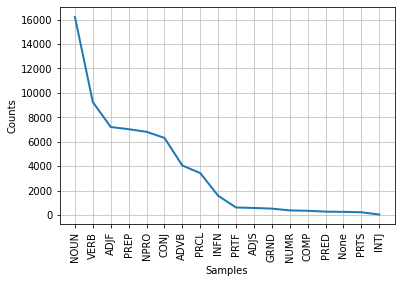

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
# 2.6 pymorphy2
from nltk import FreqDist
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

freq = FreqDist([morph.parse(str(token))[0].tag.POS for token in book])
freq.plot()

NOUN	имя существительное
ADJF	имя прилагательное (полное)
ADJS	имя прилагательное (краткое)
COMP	компаратив
VERB	глагол (личная форма)
INFN	глагол (инфинитив)
PRTF	причастие (полное)
PRTS	причастие (краткое)
GRND	деепричастие
NUMR	числительное
ADVB	наречие
NPRO	местоимение-существительное
PRED	предикатив
PREP	предлог
CONJ	союз
PRCL	частица
INTJ	междометие

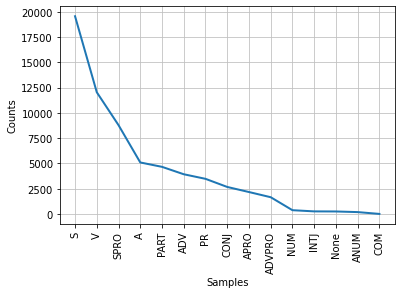

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
from pymystem3 import Mystem
import re
mystem_analyzer = Mystem()

grs = []
for token in book:
  lemma = mystem_analyzer.analyze(str(token))[0]
  if 'analysis' in lemma and len(lemma['analysis']) != 0:
    grs.append(re.split(r'[^A-Z]+', lemma['analysis'][0]['gr'])[0])
  else:
    grs.append('None')

freq = FreqDist(grs)
freq.plot()

A	прилагательное
ADV	наречие
ADVPRO	местоименное наречие
ANUM	числительное-прилагательное
APRO	местоимение-прилагательное
COM	часть композита - сложного слова
CONJ	союз
INTJ	междометие
NUM	числительное
PART	частица
PR	предлог
S	существительное
SPRO	местоимение-существительное
V	глагол

**Задание 3**

Возьмите абзац из изначального текста задания 2 (3 - 8 предложений), замените в нём время всех глаголов (например, прошедшее на настоящее или будущее), число всех существительных (единственное на множественное, множественное на единственное), сделайте согласование по числу глаголов и существительных. 

Например, вместо изначального 

*Слон подарил мартышке цветы*

должно получиться
 
Слоны подарят мартышкам цветок.

In [104]:
paragraph_raw = """
Я родился в 1927 году - единственный сын небогатых англичан, которым до
самой смерти не удавалось  вырваться  за  пределы  тени  уродливой  карлицы,
королевы Виктории, причудливо простершейся в грядущее. Закончил  школу,  два
года болтался в армии, поступил в Оксфорд; тут-то я и  начал  понимать,  что
совсем не тот, каким мне хотелось бы быть.
     Что генеалогия моя никуда не годится, я выяснил  давным-давно.  Отец  -
бригадный генерал, причем вовсе  не  благодаря  выдающимся  профессиональным
качествам, а просто потому, что достиг нужного  возраста  в  нужный  момент;
мать - типичная жена будущего генерал-майора. А именно: она никогда  ему  не
перечила и вела себя так, будто муж следит за ней из соседней комнаты,  даже
если он находился за тысячи миль от дома. Во время войны отец наезжал редко,
и мало-мальски привлекательный образ, выдуманный мною, пока он отсутствовал,
всякий  раз  приходилось  подвергать   генеральному   пересмотру   (каламбур
неуклюжий, но точный) в первые же дни его побывки.
     Как любой человек не на своем месте, он жить не мог  без  банальщины  и
мелочной  показухи;  мозги  ему  заменяла  кольчуга   отвлеченных   понятий:
Дисциплина, Традиции, Ответственность... И когда я осмеливался возразить ему
- что бывало очень редко, -  он  принимался  утюжить  меня  сими  священными
словами, как какого-нибудь зарвавшегося лейтенантика. А если жертва и тут не
падала замертво, давал волю рыжему цепному псу - гневу.
"""
paragraph_raw = "Слон подарил мартышке цветы"

In [105]:
paragraph_nlp = spacy.load('ru_core_news_lg')
paragraph = paragraph_nlp(paragraph_raw)

In [106]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()


def change_number(parsed_token):
  if parsed_token.tag.number == 'sing':
    if parsed_token.tag.POS == 'NOUN':
      plural = parsed_token.inflect({'plur', parsed_token.tag.case})
    else:
      plural = parsed_token.inflect({'plur'})
    if plural:
      return plural
    else:
      return parsed_token
  else:
    if parsed_token.tag.POS == 'NOUN':
      singular = parsed_token.inflect({'sing', parsed_token.tag.case})
    else:
      singular = parsed_token.inflect({'sing'})
    if singular:
      return singular
    else:
      return parsed_token


def change_tense(parsed_token):
  if parsed_token.tag.tense == 'past' or parsed_token.tag.tense == 'pres':
    plural = parsed_token.inflect({'futr', parsed_token.tag.person if parsed_token.tag.person else '3per'})
    if plural:
      return plural
    else:
      return parsed_token
  else:
    singular = parsed_token.inflect({'past',parsed_token.tag.person if parsed_token.tag.person else '3per'})
    if singular:
      return singular
    else:
      return parsed_token


processed_paragraph = []
for token in paragraph:
  if str(token).isalpha():
    parsed_token = morph.parse(str(token))[0]
    if parsed_token.tag.POS == 'NOUN':
      processed_paragraph.append(change_number(parsed_token).word)
    elif parsed_token.tag.POS == 'VERB':
      verb_changed_number = change_number(parsed_token)
      processed_paragraph.append(change_tense(verb_changed_number).word)
    else:
      processed_paragraph.append(str(token))
  else:
    processed_paragraph.append(str(token))

print(' '.join(processed_paragraph))

слоны подарят мартышкам цветок


Я родился в 1927 году - единственный сын небогатых англичан, которым до
самой смерти не удавалось  вырваться  за  пределы  тени  уродливой  карлицы,
королевы Виктории, причудливо простершейся в грядущее. Закончил  школу,  два
года болтался в армии, поступил в Оксфорд; тут-то я и  начал  понимать,  что
совсем не тот, каким мне хотелось бы быть.
     Что генеалогия моя никуда не годится, я выяснил  давным-давно.  Отец  -
бригадный генерал, причем вовсе  не  благодаря  выдающимся  профессиональным
качествам, а просто потому, что достиг нужного  возраста  в  нужный  момент;
мать - типичная жена будущего генерал-майора. А именно: она никогда  ему  не
перечила и вела себя так, будто муж следит за ней из соседней комнаты,  даже
если он находился за тысячи миль от дома. Во время войны отец наезжал редко,
и мало-мальски привлекательный образ, выдуманный мною, пока он отсутствовал,
всякий  раз  приходилось  подвергать   генеральному   пересмотру   (каламбур
неуклюжий, но точный) в первые же дни его побывки.
     Как любой человек не на своем месте, он жить не мог  без  банальщины  и
мелочной  показухи;  мозги  ему  заменяла  кольчуга   отвлеченных   понятий:
Дисциплина, Традиции, Ответственность... И когда я осмеливался возразить ему
- что бывало очень редко, -  он  принимался  утюжить  меня  сими  священными
словами, как какого-нибудь зарвавшегося лейтенантика. А если жертва и тут не
падала замертво, давал волю рыжему цепному псу - гневу.

## Библиотека [pymorphy2](https://pymorphy2.readthedocs.io/en/stable/user/index.html).

Установка библиотеки

In [ ]:
!pip install pymorphy2[fast] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.1/371.1 KB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for DAWG: filename=DAWG-0.8.0-cp38-cp38-linux_x86_64.whl size=1312974 sha256=00245af5f52670491d902e64ca2a1521f7ed49c571918aeac88fe641e1897481
  Stored in directory: /root/.cache/pip/wheels/1c/e6/8f/313a7ccc57b29a7affb7205664277a1d5ebe73bf600a69a615
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=94f8cc7bd65cfe0dd9768a96ca56e14b7a185c24786936939157c1230dc6d1b5
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built DAWG docopt


Подключение библиотеки

In [ ]:
import pymorphy2

Создаем морфологический анализатор pymorphy2

In [ ]:
morph = pymorphy2.MorphAnalyzer()

Выполняем морфологический разбор

In [ ]:
morph.parse('деревья')

[Parse(word='деревья', tag=OpencorporaTag('NOUN,inan,neut plur,nomn'), normal_form='дерево', score=0.653846, methods_stack=((DictionaryAnalyzer(), 'деревья', 1330, 7),)),
 Parse(word='деревья', tag=OpencorporaTag('NOUN,inan,neut plur,accs'), normal_form='дерево', score=0.346153, methods_stack=((DictionaryAnalyzer(), 'деревья', 1330, 13),))]

In [ ]:
morph.parse('родился')

[Parse(word='родился', tag=OpencorporaTag('VERB,perf,intr masc,sing,past,indc'), normal_form='родиться', score=0.5, methods_stack=((DictionaryAnalyzer(), 'родился', 2802, 1),)),
 Parse(word='родился', tag=OpencorporaTag('VERB,impf,intr masc,sing,past,indc'), normal_form='родиться', score=0.5, methods_stack=((DictionaryAnalyzer(), 'родился', 2802, 21),))]

Неоднозначное слово

In [ ]:
morph.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

Сложное слово

In [ ]:
morph.parse('физико-математической')

[Parse(word='физико-математической', tag=OpencorporaTag('ADJF femn,sing,gent'), normal_form='физико-математический', score=0.25, methods_stack=((DictionaryAnalyzer(), 'физико-математической', 16, 8),)),
 Parse(word='физико-математической', tag=OpencorporaTag('ADJF femn,sing,datv'), normal_form='физико-математический', score=0.25, methods_stack=((DictionaryAnalyzer(), 'физико-математической', 16, 9),)),
 Parse(word='физико-математической', tag=OpencorporaTag('ADJF femn,sing,ablt'), normal_form='физико-математический', score=0.25, methods_stack=((DictionaryAnalyzer(), 'физико-математической', 16, 11),)),
 Parse(word='физико-математической', tag=OpencorporaTag('ADJF femn,sing,loct'), normal_form='физико-математический', score=0.25, methods_stack=((DictionaryAnalyzer(), 'физико-математической', 16, 13),))]

Местоимение

In [ ]:
morph.parse('его')

[Parse(word='его', tag=OpencorporaTag('NPRO,masc,3per,Anph sing,accs'), normal_form='он', score=0.23913, methods_stack=((DictionaryAnalyzer(), 'его', 2304, 5),)),
 Parse(word='его', tag=OpencorporaTag('NPRO,neut,3per,Anph sing,accs'), normal_form='оно', score=0.065217, methods_stack=((DictionaryAnalyzer(), 'его', 2307, 5),)),
 Parse(word='его', tag=OpencorporaTag('ADJF,Fixd,Apro,Anph femn,sing,gent'), normal_form='его', score=0.043478, methods_stack=((DictionaryAnalyzer(), 'его', 1440, 7),)),
 Parse(word='его', tag=OpencorporaTag('ADJF,Fixd,Apro,Anph neut,sing,gent'), normal_form='его', score=0.043478, methods_stack=((DictionaryAnalyzer(), 'его', 1440, 13),)),
 Parse(word='его', tag=OpencorporaTag('ADJF,Fixd,Apro,Anph plur,nomn'), normal_form='его', score=0.043478, methods_stack=((DictionaryAnalyzer(), 'его', 1440, 18),)),
 Parse(word='его', tag=OpencorporaTag('ADJF,Fixd,Apro,Anph plur,datv'), normal_form='его', score=0.043478, methods_stack=((DictionaryAnalyzer(), 'его', 1440, 20),)),

Числительное

In [ ]:
morph.parse('1981')

[Parse(word='1981', tag=OpencorporaTag('NUMB,intg'), normal_form='1981', score=1.0, methods_stack=((NumberAnalyzer(score=0.9), '1981'),))]

Знак препинания

In [ ]:
morph.parse('.')

[Parse(word='.', tag=OpencorporaTag('PNCT'), normal_form='.', score=1.0, methods_stack=((PunctuationAnalyzer(score=0.9), '.'),))]

Незнакомые слова

In [ ]:
morph.parse('варкалось')

[Parse(word='варкалось', tag=OpencorporaTag('NOUN,anim,masc sing,nomn'), normal_form='варкалось', score=0.5000531180282588, methods_stack=((DictionaryAnalyzer(), 'лось', 123, 0), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'варка'))),
 Parse(word='варкалось', tag=OpencorporaTag('VERB,impf,intr neut,sing,past,indc'), normal_form='варкаться', score=0.4999468819717412, methods_stack=((FakeDictionary(), 'варкалось', 234, 9), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'алось')))]

In [ ]:
morph.parse('хливкие')

[Parse(word='хливкие', tag=OpencorporaTag('NOUN,inan,masc sing,loct'), normal_form='хливкий', score=0.5294117647058824, methods_stack=((DictionaryAnalyzer(), 'кие', 1776, 6), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'хлив'))),
 Parse(word='хливкие', tag=OpencorporaTag('ADJF plur,nomn'), normal_form='хливкий', score=0.23529411764705882, methods_stack=((FakeDictionary(), 'хливкие', 511, 20), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'вкие'))),
 Parse(word='хливкие', tag=OpencorporaTag('ADJF inan,plur,accs'), normal_form='хливкий', score=0.23529411764705882, methods_stack=((FakeDictionary(), 'хливкие', 511, 24), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'вкие')))]

In [ ]:
morph.parse('шорьки')

[Parse(word='шорьки', tag=OpencorporaTag('NOUN,inan,masc plur,nomn'), normal_form='шорёк', score=0.5, methods_stack=((FakeDictionary(), 'шорьки', 628, 6), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'орьки'))),
 Parse(word='шорьки', tag=OpencorporaTag('NOUN,inan,masc plur,accs'), normal_form='шорёк', score=0.5, methods_stack=((FakeDictionary(), 'шорьки', 628, 9), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'орьки')))]

Склонение слов

In [ ]:
m = morph.parse('кот')[0]

In [ ]:
m

Parse(word='кот', tag=OpencorporaTag('NOUN,anim,masc sing,nomn'), normal_form='кот', score=1.0, methods_stack=((DictionaryAnalyzer(), 'кот', 52, 0),))

In [ ]:
m.inflect({'gent'})

Parse(word='кота', tag=OpencorporaTag('NOUN,anim,masc sing,gent'), normal_form='кот', score=1.0, methods_stack=((DictionaryAnalyzer(), 'кота', 52, 1),))

In [ ]:
m.inflect({'datv'})

Parse(word='коту', tag=OpencorporaTag('NOUN,anim,masc sing,datv'), normal_form='кот', score=1.0, methods_stack=((DictionaryAnalyzer(), 'коту', 52, 2),))

In [ ]:
last_name = morph.parse('Сегалович')[0]

In [ ]:
last_name.inflect({'gent'})

Parse(word='сегаловича', tag=OpencorporaTag('NOUN,anim,masc,Patr sing,gent'), normal_form='сегалович', score=1.0, methods_stack=((DictionaryAnalyzer(), 'аловича', 26, 1), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'сег')))

# Mystem

Как с ним работать:
* можно скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - обертка для питона, работает медленнее, но это удобно

In [ ]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin - путь к `mystem`, если их несколько
* grammar_info - нужна ли грамматическая информация или только леммы (по дефолту нужна)
* disambiguation - нужно ли снятие омонимии - дизамбигуация (по дефолту нужна)
* entire_input - нужно ли сохранять в выводе все (пробелы всякие, например), или можно выкинуть (по дефолту оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [ ]:
example = 'Но не каждый хочет что-то исправлять:('
print(mystem_analyzer.lemmatize(example))

['но', ' ', 'не', ' ', 'каждый', ' ', 'хотеть', ' ', 'что-то', ' ', 'исправлять', ':(\n']


А можно получить грамматическую информацию:

In [ ]:
mystem_analyzer.analyze(example)

[{'analysis': [{'lex': 'но', 'wt': 0.9998906299, 'gr': 'CONJ='}],
  'text': 'Но'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'каждый',
    'wt': 0.9985975799,
    'gr': 'APRO=(вин,ед,муж,неод|им,ед,муж)'}],
  'text': 'каждый'},
 {'text': ' '},
 {'analysis': [{'lex': 'хотеть',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'хочет'},
 {'text': ' '},
 {'analysis': [{'lex': 'что-то', 'wt': 1, 'gr': 'SPRO,ед,сред,неод=(вин|им)'}],
  'text': 'что-то'},
 {'text': ' '},
 {'analysis': [{'lex': 'исправлять', 'wt': 1, 'gr': 'V,пе=инф,несов'}],
  'text': 'исправлять'},
 {'text': ':(\n'}]

#SnowballStemmer для русского языка

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian") 
stemmer.stem("противоестественный")


'противоестествен'

## Полезные ссылки

1. [Библиотека pymorphy2](https://pymorphy2.readthedocs.io/en/stable/index.html).
2. [Открытый корпус текстов OpenCorpora](http://opencorpora.org/).
3. [Анализатор mystem](https://tech.yandex.ru/mystem/).
